# **Given information about placement data of a batch of students in college campus, predict whether the student will be placed or not.**

Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!wget https://raw.githubusercontent.com/amm-ik/ml-datasets/main/module-1/placementData.csv

--2023-05-12 02:39:28--  https://raw.githubusercontent.com/amm-ik/ml-datasets/main/module-1/placementData.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19712 (19K) [text/plain]
Saving to: ‘placementData.csv.1’

placementData.csv.1 100%[===================>]  19.25K  --.-KB/s    in 0.001s  

2023-05-12 02:39:28 (20.5 MB/s) - ‘placementData.csv.1’ saved [19712/19712]



# Read the file and Observe

In [ ]:
df = pd.read_csv("placementData.csv")
df.head(20)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


Let's try to explore these features - Both categorical and numerical.
Check For -
1. Data types of each features
2. Missing Values
3. Unique Values
4. Encode categorical features  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [ ]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


Drop columns that are of no use. In our case, we have no use of sl_no

In [ ]:
df.drop(['sl_no'], axis=1, inplace=True)

We also should drop the salary column as it is an indirect indicator of placement status. If we train on this feature, the algorithm may just learn that those who have a salary are placed, while those who do not are not placed.

In [ ]:
df = df.drop(['salary'], axis=1)

Now let's look at the distribution of values for our output variable which is placement 'status'

<Axes: xlabel='status', ylabel='count'>

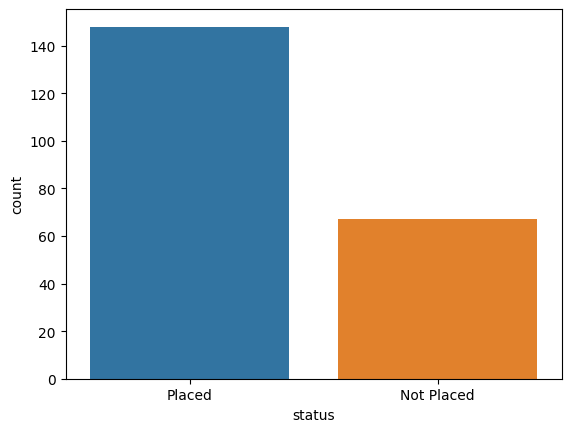

In [ ]:
sns.countplot(x='status', data=df)

Can we obtain some insights on the dataset using -
1. Categorical Plots such as (but not limited to)

  *   Gender comparison - *(Discussed below)*
  *   Influence of any specialization/school courses in Job
  *   Placement statistics with respect to various features

2. Correlation Matrix/ Heat maps between features

In [ ]:
# Check gender distribution
distribution_df = pd.DataFrame(df.groupby(['gender','status'])['status'].count())
print(distribution_df)

                   status
gender status            
F      Not Placed      28
       Placed          48
M      Not Placed      39
       Placed         100


<Axes: xlabel='gender', ylabel='count'>

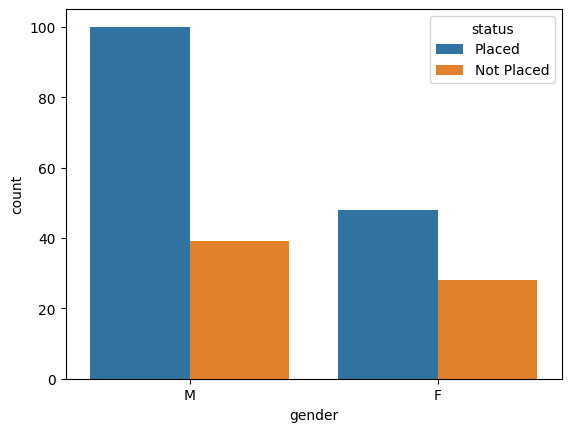

In [ ]:
# Plotting placement stats by gender
sns.countplot(x='gender', hue='status', data=df)

A higher percentage of females are unplaced compared to males - bias?

Text(92.09722222222221, 0.5, 'Degree')

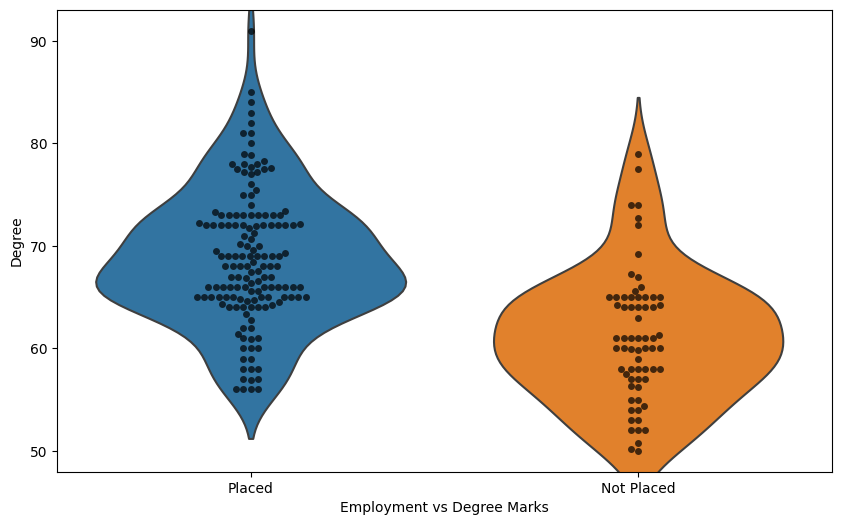

In [ ]:
# Plotting Placement stats by degree percentage
plt.figure(figsize=(10,6))
sns.violinplot(y='degree_p', x='status', data=df, inner=None)
sns.swarmplot(y='degree_p', x='status', data=df, color='k', alpha=0.7)
plt.xlabel('Employment vs Degree Marks')
plt.ylabel('Degree')

People who were placed have a higher percentage of marks in their degrees. Thus, this feature seems to be a good indicator if placement status. Can we find some more interesting insights through this dataset?

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:k'` for same effect.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='variable', ylabel='value'>

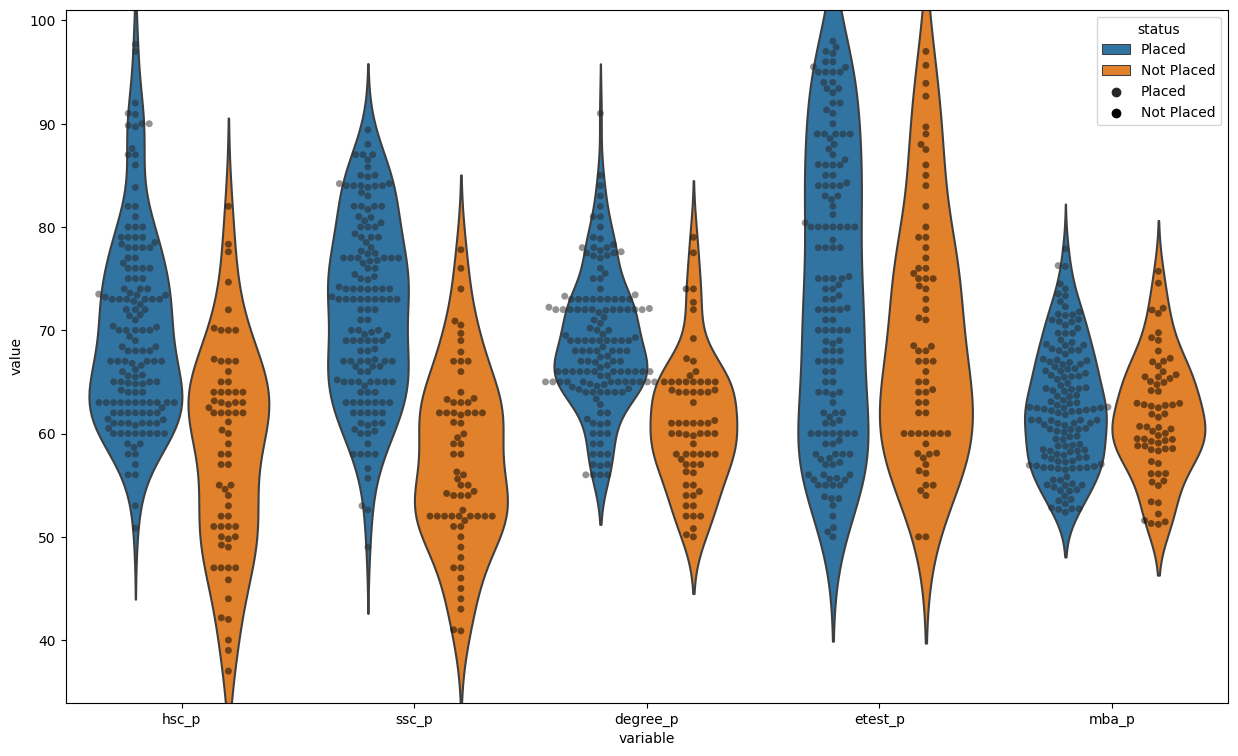

In [ ]:
# Let's plot all the numerical variables to see if any of them explain the placement status
numerical_df = df[['hsc_p', 'ssc_p', 'degree_p', 'etest_p', 'mba_p', 'status']]
plt.figure(figsize=(15,9))
sns.violinplot(x="variable", y="value", hue="status", inner=None, data=pd.melt(numerical_df, id_vars=['status']))
sns.swarmplot(x="variable", y="value", hue="status", dodge=True, color='k', alpha=0.5, data=pd.melt(numerical_df, id_vars=['status']))

Apart from `etest_p` and `mba_p`, all other features seem to affect the placement status of the students. Now let's look at the categorical features to figure out which afect the placement status more.

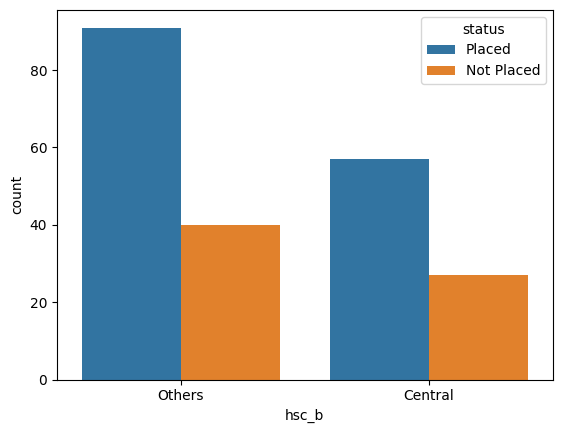

In [ ]:
sns.countplot(x="hsc_b", hue="status", data=df)
plt.show()

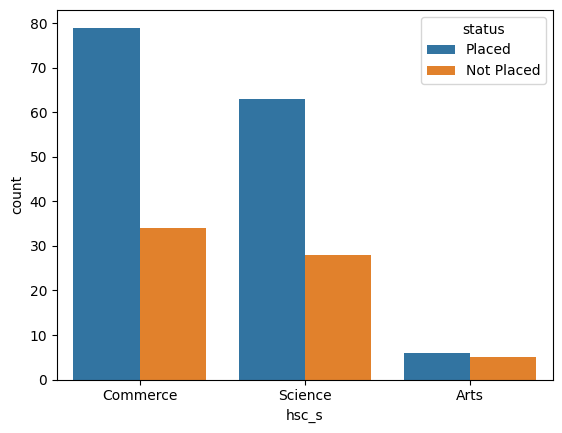

In [ ]:
sns.countplot(x="hsc_s", hue="status", data=df)
plt.show()

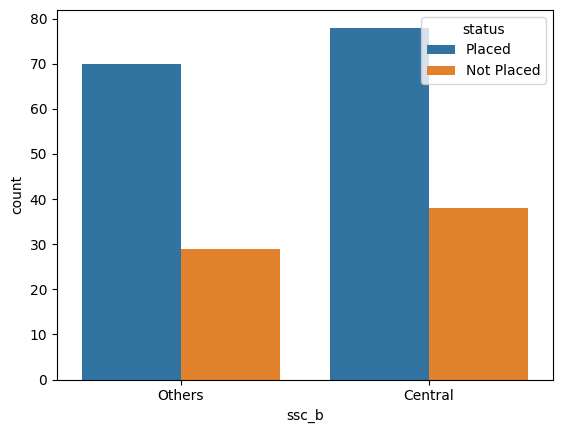

In [ ]:
sns.countplot(x="ssc_b", hue="status", data=df)
plt.show()

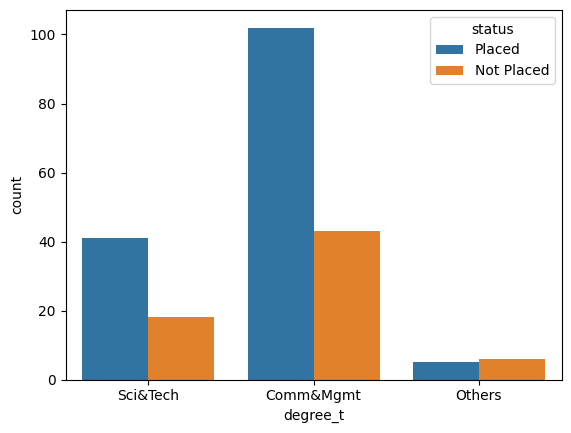

In [ ]:
sns.countplot(x="degree_t", hue="status", data=df)
plt.show()

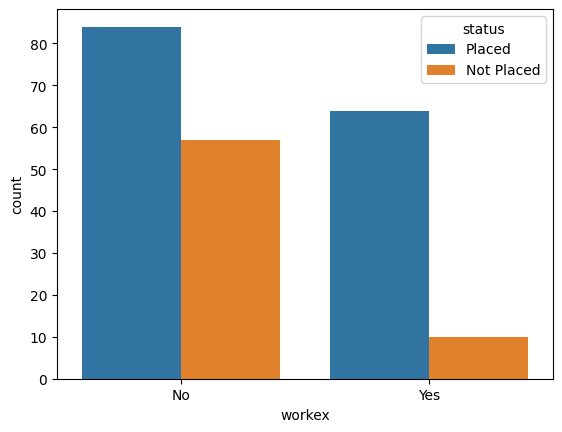

In [ ]:
sns.countplot(x="workex", hue="status", data=df)
plt.show()

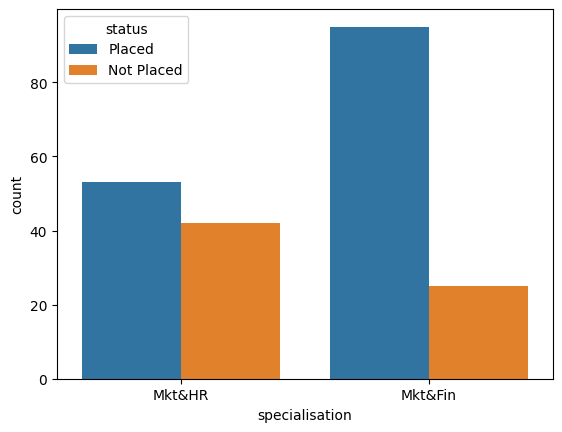

In [ ]:
sns.countplot(x="specialisation", hue="status", data=df)
plt.show()

Based on all the plots above, it seems that `workex` seems to be affecting the placement status a lot. A higher percentage of people with work experience are placed compared to the ones without it. Also, `specialisation` also affects the placement status to a large degree. Other than these, `hsc_s` and `degree_t` might also be affecting the placement status. We will keep these features and discard the rest.

In [ ]:
## Discard unneeded features
drop_features = ['mba_p', 'etest_p', 'hsc_b', 'ssc_b']
df = df.drop(drop_features, axis = 1)

In [ ]:
df.columns

Index(['gender', 'ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t', 'workex',
       'specialisation', 'status'],
      dtype='object')

**REMINDER**

Let's do the following data preparation steps, before using logistic regression to predict the placement status

1.   Encoded all the categorical features
2.   Collinearity Test
3.   Normalisation/Standardization of features
4.   Handled all missing values, noisy inputs.





In [ ]:
# Seperating Features and Target
X = df[['gender', 'ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t', 'workex','specialisation']]
y = df['status']
# One-Hot Encoding
X = pd.get_dummies(X)

In [ ]:
# Feature scaling. All values scaled between 0-1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

OK, let's split our dataset into train-dev-test  

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=100)

Using logistic regression to fit the model on training set

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Using a k-Nearest Neighbor Classifier to fit the model on training set

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
y_pred_neigh = neigh.predict(X_test)

Let's try to measure performance using -
1. Confusion Matrix
2. Accuracy
3. Precision
4. Recall
5. ROC Curve
6. AUC to Compare the performance of classification algorithms used
7. Precision Recall Curve  

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

In [ ]:
print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred_neigh))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
ConfusionMatrixDisplay.from_estimator(neigh, X_test, y_test)

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model, X_test, y_test)
RocCurveDisplay.from_estimator(neigh, X_test, y_test)

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
PrecisionRecallDisplay.from_estimator(neigh, X_test, y_test)

How can we check if our model is overfitting on the dataset ? What about outliers, are they affecting our model's performance ?


In [ ]:
# To check for over fitting we can look at different regularization levels and find the point where performance is best on test data.

from sklearn.metrics import precision_recall_fscore_support

#Add C for regularization...let's see what level of regularization gives better performance. Default value is 1.0
C = [0.2, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 5.0]
print("Logistic Regression")
for c in C:
  model = LogisticRegression(C=c, max_iter=100, tol=1e-6)
  model.fit(X_train, y_train)
  ypred = model.predict( X_test )
  p, r, f, s = precision_recall_fscore_support( y_test, ypred, average='micro')
  print("c: %.2f - f1: %.4f" %(c, f))

print("============")


#Regularize by searching for different number of neighbors
N = [1, 2, 3, 4, 5, 6]
print("KNN")
for n in N:
  neigh = KNeighborsClassifier(n_neighbors=n)
  neigh.fit(X_train, y_train)
  ypred = neigh.predict(X_test)

  p, r, f, s = precision_recall_fscore_support( y_test, ypred, average='micro')
  print("n: %d - f1: %.4f" %(n, f))

print("===========")

